In [1]:
import os
import numpy as np
import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load in Data

In [2]:
kenya_name = 'kenya'
rwanda_name = 'rwanda'
tanzania_name = 'tanzania'
uganda_name = 'uganda'

data_path = '../data/'
full = 'full'
append_in = '_'+full+'.csv'

#where to load from
kenya_load = os.path.join(data_path, full, kenya_name+append_in)
rwanda_load = os.path.join(data_path, full, rwanda_name+append_in)
tanzania_load = os.path.join(data_path, full, tanzania_name+append_in)
uganda_load = os.path.join(data_path, full, uganda_name+append_in)

In [3]:
#load data
kenya = pd.read_csv(kenya_load, index_col=0)
rwanda = pd.read_csv(rwanda_load, index_col=0)
tanzania = pd.read_csv(tanzania_load, index_col=0)
uganda = pd.read_csv(uganda_load, index_col=0)

#drop date column, we don't need this anymore
kenya.drop('Date-Monthly', axis=1, inplace=True)
rwanda.drop('Date-Monthly', axis=1, inplace=True)
tanzania.drop('Date-Monthly', axis=1, inplace=True)
uganda.drop('Date-Monthly', axis=1, inplace=True)

In [4]:
#i shortened some column names to make the feature importances plots easier to read
new_columns = ['precip', 'mintemp', 'maxtemp', 'DAP', 'Urea', 'Rural population',
       'Total Population - Both sexes', 'Total Population - Female',
       'Total Population - Male', 'Urban population',
       'Average dietary energy supply adequacy',
       'Political stability, absence of violence/terrorism index',
       'Agricultural land (1000 ha)', 'Arable land (1000 ha)',
       'Country area (1000 ha)', 'Cropland (1000 ha)', 'Forest land (1000 ha)',
       'Land area (1000 ha)', 'Land under permanent crops (1000 ha)',
       'Other naturally regenerated forest (1000 ha)',
       'Planted Forest (1000 ha)', 'Primary Forest (1000 ha)', 'price']

kenya.columns = new_columns
rwanda.columns = new_columns
tanzania.columns = new_columns
uganda.columns = new_columns

In [5]:
kenya.head()

,precip,mintemp,maxtemp,DAP,Urea,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population,...,Arable land (1000 ha),Country area (1000 ha),Cropland (1000 ha),Forest land (1000 ha),Land area (1000 ha),Land under permanent crops (1000 ha),Other naturally regenerated forest (1000 ha),Planted Forest (1000 ha),Primary Forest (1000 ha),price
0,4.460338,10.782270,27.047728,0.719813,0.583126,31314.145917,41560.307667,20926.222417,20634.092417,9572.27775,...,5500.0,58037.0,6020.0,4230.0,56914.0,520.0,4037.0,193.0,0.0,0.68
1,7.107909,10.659104,26.831646,0.719813,0.583126,31372.013333,41654.381333,20973.346333,20681.042333,9607.15600,...,5500.0,58037.0,6020.0,4230.0,56914.0,520.0,4037.0,193.0,0.0,0.64
2,11.365962,11.953104,27.468187,0.719813,0.583126,31429.880750,41748.455000,21020.470250,20727.992250,9642.03425,...,5500.0,58037.0,6020.0,4230.0,56914.0,520.0,4037.0,193.0,0.0,0.63
3,12.749496,13.551364,25.737667,0.737450,0.590842,31487.748167,41842.528667,21067.594167,20774.942167,9676.91250,...,5500.0,58037.0,6020.0,4230.0,56914.0,520.0,4037.0,193.0,0.0,0.64
4,10.510549,12.708521,25.077250,0.726427,0.571000,31545.615583,41936.602333,21114.718083,20821.892083,9711.79075,...,5500.0,58037.0,6020.0,4230.0,56914.0,520.0,4037.0,193.0,0.0,0.65


In [6]:
rwanda.head()

,precip,mintemp,maxtemp,DAP,Urea,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population,...,Arable land (1000 ha),Country area (1000 ha),Cropland (1000 ha),Forest land (1000 ha),Land area (1000 ha),Land under permanent crops (1000 ha),Other naturally regenerated forest (1000 ha),Planted Forest (1000 ha),Primary Forest (1000 ha),price
0,13.941298,13.327754,24.736055,0.565489,0.488326,8418.583167,9932.434667,5064.679833,4867.754833,1716.0105,...,1123.92,2634.0,1373.92,446.0,2467.0,250.0,55.0,384.0,7.0,0.42
1,31.847662,13.014627,24.108702,0.565489,0.488326,8437.195333,9953.815333,5075.435667,4878.379667,1719.8480,...,1123.92,2634.0,1373.92,446.0,2467.0,250.0,55.0,384.0,7.0,0.42
2,15.493356,14.120647,24.633526,0.565489,0.488326,8455.807500,9975.196000,5086.191500,4889.004500,1723.6855,...,1123.92,2634.0,1373.92,446.0,2467.0,250.0,55.0,384.0,7.0,0.42
3,18.309883,13.764366,24.545443,0.565489,0.488326,8474.419667,9996.576667,5096.947333,4899.629333,1727.5230,...,1123.92,2634.0,1373.92,446.0,2467.0,250.0,55.0,384.0,7.0,0.37
4,15.413672,13.781482,23.507832,0.565489,0.488326,8493.031833,10017.957333,5107.703167,4910.254167,1731.3605,...,1123.92,2634.0,1373.92,446.0,2467.0,250.0,55.0,384.0,7.0,0.44


Below, I am going to write a method that inputs a pandas DataFrame and performs a cross-validated random search for the best hyperparameters.  If you are interested in the differences between grid and random search, I found this [stackexchange](https://stats.stackexchange.com/questions/160479/practical-hyperparameter-optimization-random-vs-grid-search) post helpful.

I will be comparing two different models, RandomForest and XGBoost for regression. There are two main reasons we are using tree-based models in this project. 
- We want to be able to get out feature importances, since that is the main objective of this project: making crop prices interpretable.
- Tree-based models perform well when you have more columns (features) than rows (observations). That is definitely the case for this analysis, where the time period is short and at relatively course resolution, but there are a lot of variables that we want to look at.

First, though, we need to decide on a metric to use. Because we are trying to fit data where the target variable is price (on a continuous scale), we need to use some sort of squared error like mean squared error (MSE). Let's see what our options are in scikit-learn.

In [7]:
error_metrics = [metric for metric in sklearn.metrics.SCORERS.keys() if 'error' in metric]
error_metrics

['max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error']

Thanks to the following two blog posts for helping design the method below:
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

We can view the hyperparameters available to us in each of the models we are interested in.

In [8]:
rf_param_dict = RandomForestRegressor().get_params()
extra_param_dict = ExtraTreesRegressor().get_params()

rf_defaults = pd.DataFrame.from_dict(rf_param_dict, orient='index', columns=['RandomForest'])
extra_defaults = pd.DataFrame.from_dict(extra_param_dict, orient='index', columns=['ExtraTrees'])

default_params = rf_defaults.join(extra_defaults, how='left')
default_params.head(20)

,RandomForest,ExtraTrees
bootstrap,True,False
ccp_alpha,0,0
criterion,mse,mse
max_depth,None,None
max_features,auto,auto
max_leaf_nodes,None,None
max_samples,None,None
min_impurity_decrease,0,0
min_impurity_split,None,None
min_samples_leaf,1,1


## Random Search, Cross-Validation

In [9]:
def randomsearch_cv(df):
    """
    
    Parameters:
      df: a DataFrame where the last column is the target variable
      
    Returns:
      forest_model: A RandomizedSearchCV object containing a RandomForestRegressor
                    model and parameters after cross-validation
      extra_model: A RandomizedSearchCV object containing an AdaBoostRegressor
                    model and parameters after cross-validation 
    """
     #this is true for every dataset, price is the last column
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    
    num_iter = 10
    random = 0   #makes sure the models and grid search object give the same results every time
    
    #instantiate models here
    forest = RandomForestRegressor(random_state=random)
    extra = ExtraTreesRegressor(random_state=random)

    #define parameters dictionaries here
    ensemble_params = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
                 'max_depth': [1, 2, 4, 6, 8, 10, 20, 30, None],  #higher values often lead to overfitting
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                'bootstrap': [True, False]
                }
    
    #create our random search cv objects
    forest_search = RandomizedSearchCV(estimator=forest,
                            param_distributions=ensemble_params,
                            n_iter=num_iter,         #number of parameter settings sampled
                            scoring='neg_root_mean_squared_error',
                            n_jobs=-1,         #use all processors available
                            cv=5,
                            verbose=2,         #print results during tuning
                            random_state=random
    )
    
    extra_search = RandomizedSearchCV(estimator=extra,
                            param_distributions=ensemble_params,
                            n_iter=num_iter,         #number of parameter settings sampled
                            scoring='neg_root_mean_squared_error',
                            n_jobs=-1,         #use all processors available
                            cv=5,
                            verbose=2,         #print results during tuning
                            random_state=random
    )
    
    #now fit the search objects and return them
    forest_model = forest_search.fit(X, y)
    extra_model = extra_search.fit(X, y)
    
    return forest_model, extra_model

Below, we can get the fitted models back for each country.

In [10]:
kenya_rf, kenya_extra = randomsearch_cv(kenya)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


In [11]:
rwanda_rf, rwanda_extra = randomsearch_cv(rwanda)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


In [12]:
tanzania_rf, tanzania_extra = randomsearch_cv(tanzania)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


In [13]:
uganda_rf, uganda_extra = randomsearch_cv(uganda)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


Let's see what our best estimator parameters looked like for Kenya.

In [14]:
print('Best RandomForest model for Kenya:')
print(kenya_rf.best_params_, '\n')

print('Best ExtraTrees model for Kenya:')
print(kenya_extra.best_params_)

Best RandomForest model for Kenya:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False} 

Best ExtraTrees model for Kenya:
{'n_estimators': 8, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}


## Feature Importances

Now let's check out feature importances. Both the `RandomForestRegressor` and `ExtraTreesRegressor` models use impurity-based feature importances, so we can compare them directly. Note, this means that we can't use a [XGBoostRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html) here, because that model makes decision splits based on "weight" or information gain, which isn't directly comparable to impurity.

If you are wondering what Gini impurity is, here are some good posts on the differences between impurity, entropy, and information gain:
- https://victorzhou.com/blog/information-gain/
- https://stats.stackexchange.com/questions/349846/entropy-impurity-gini-impurity-information-gain-differences
- http://www.michaelfxu.com/machine%20learning%20series/machine-learning-decision-trees/

In [15]:
def plot_importances(df, rf, extra):
    """
    Input a dataframe as well as trained RandomForest and XGBoost
    models, plot feature importances.
    
    """
    columns = df.columns[:-1] #all columns except the target column
    importances_rf = rf.best_estimator_.feature_importances_
    importances_extra = extra.best_estimator_.feature_importances_
    
    #take the top ten feature importances
    idx_rf = np.argsort(importances_rf)
    #idx_rf = np.argsort(importances_rf)[-10:]
    #idx_xgb = np.argsort(importances_ada)[-10:]
    idx_extra = np.argsort(importances_extra)
    
    fig, ax = plt.subplots(figsize=(12, 7))
    #random forest and xgboost feature importances on the same plot
    ax.set_title('Feature Importances')
    ax.barh(range(len(idx_rf)), importances_rf[idx_rf], color='tab:blue', align='center', alpha=0.5, label='RF')
    ax.barh(range(len(idx_rf)), importances_extra[idx_rf], color='tab:orange', align='center', alpha=0.5, label='ET')
    ax.set_yticks(range(len(idx_rf)))
    ax.set_yticklabels([columns[i] for i in idx_rf], fontsize=10)
    ax.set_xlabel('Relative Importance')

    ax.legend()
    plt.show()

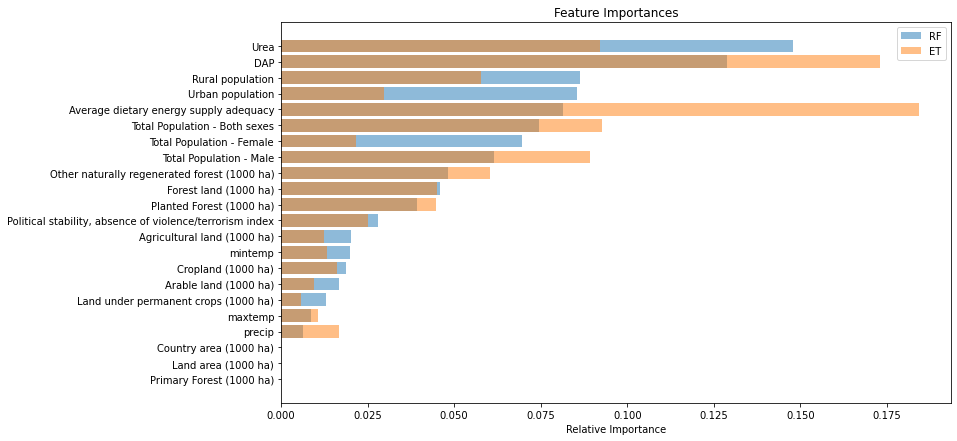

In [16]:
plot_importances(kenya, kenya_rf, kenya_extra)

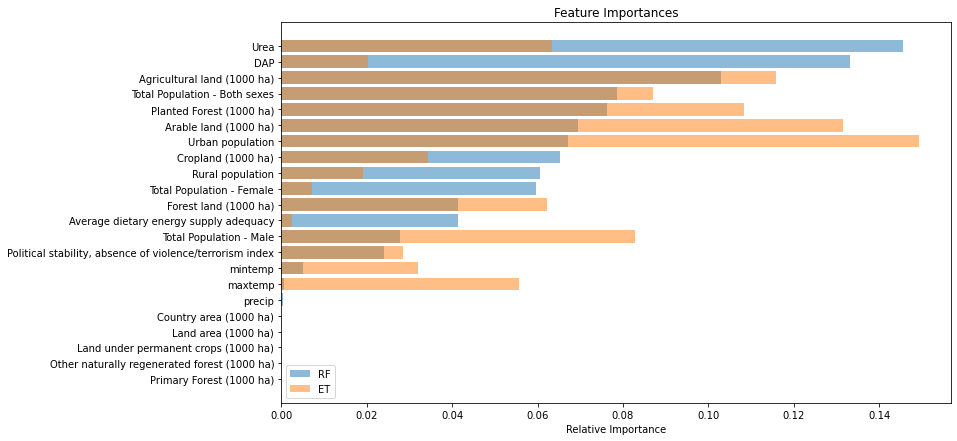

In [17]:
plot_importances(rwanda, rwanda_rf, rwanda_extra)

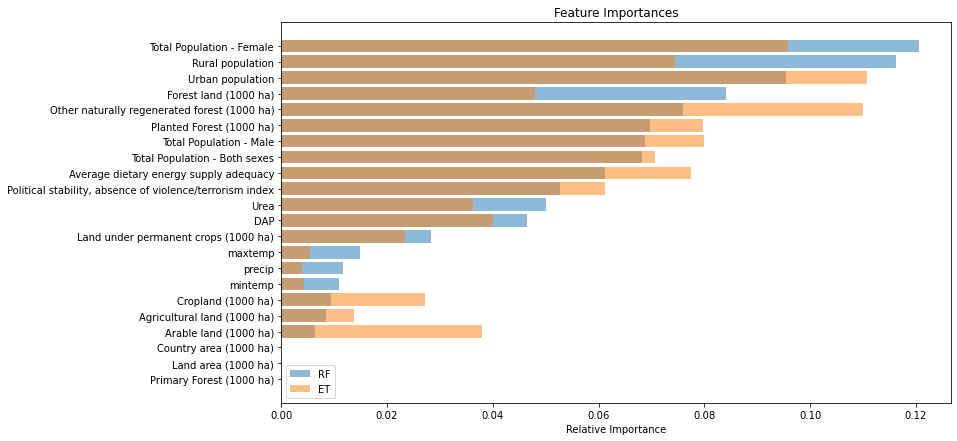

In [18]:
plot_importances(tanzania, tanzania_rf, tanzania_extra)

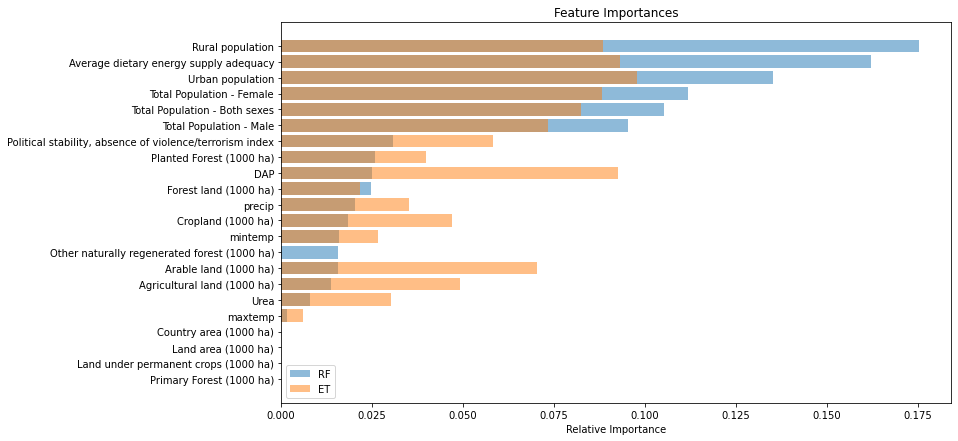

In [19]:
plot_importances(uganda, uganda_rf, uganda_extra)

So so far:
- `Kenya`: The price of fertilizers, dietary supply, and the rural population factor in prominently to price.
- `Rwanda`: population mostly determines price, but it is also affected by the amount of forested land and the political stability index. Fertilizer price also factors in importantly.
- `Tanzania`: Similar to Rwanda, but with less emphasis on fertilizer price.
- `Uganda`: seems much more influenced by population than anything else, but also is sensitive to political stability and the amount of arable land.

**To sum up so far, for these four countries I believe the most important factors in the price of beans to be total population growth (and to a lesser extent rural population growth), getting enough food from their diet, political stability and the ratio of forested land to arable farm land.**

## Pair Plots

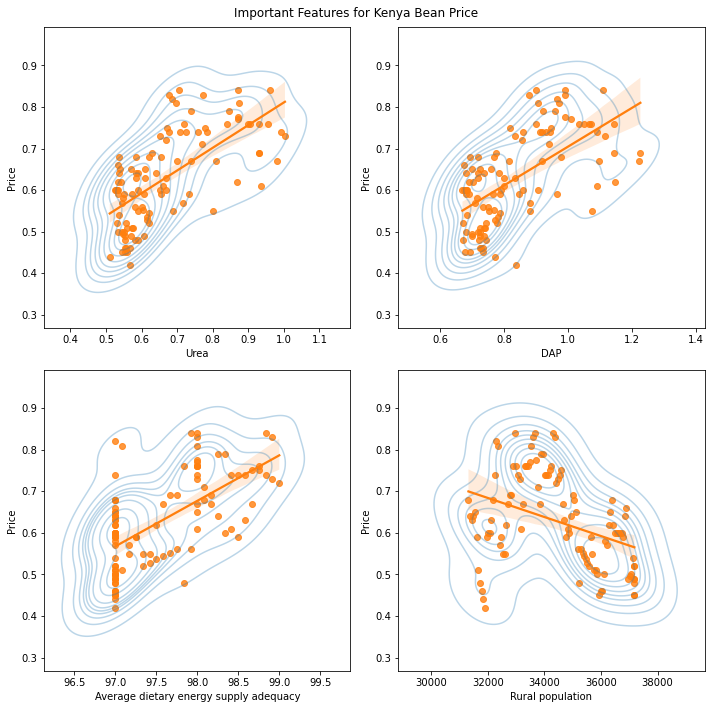

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
x_list =  ['Urea', 'DAP', 'Average dietary energy supply adequacy', 'Rural population']

#thanks to this post for how to iterate through subplots
#https://stackoverflow.com/questions/20288842/matplotlib-iterate-subplot-axis-array-through-single-list
for i, axis in enumerate(fig.axes):
    sns.kdeplot(x=x_list[i], y='price', data=kenya, alpha=0.3, ax=axis)
    sns.regplot(x=x_list[i], y='price', data=kenya, ax=axis)
    axis.set_ylabel('Price')
    
fig.suptitle('Important Features for Kenya Bean Price')
fig.tight_layout()
plt.show()

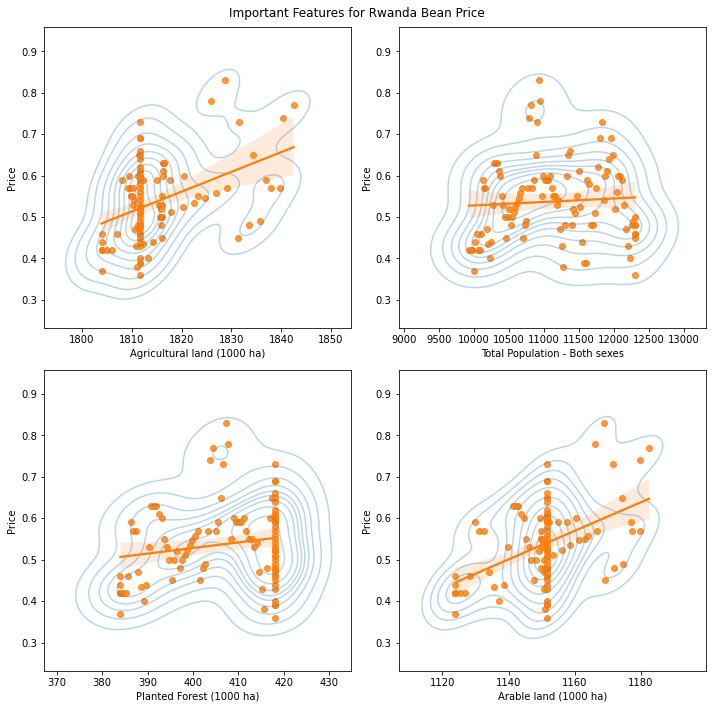

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
x_list =  ['Agricultural land (1000 ha)', 'Total Population - Both sexes',
           'Planted Forest (1000 ha)', 'Arable land (1000 ha)']

for i, axis in enumerate(fig.axes):
    sns.kdeplot(x=x_list[i], y='price', data=rwanda, alpha=0.3, ax=axis)
    sns.regplot(x=x_list[i], y='price', data=rwanda, ax=axis)
    axis.set_ylabel('Price')
    
fig.suptitle('Important Features for Rwanda Bean Price')
fig.tight_layout()
plt.show()

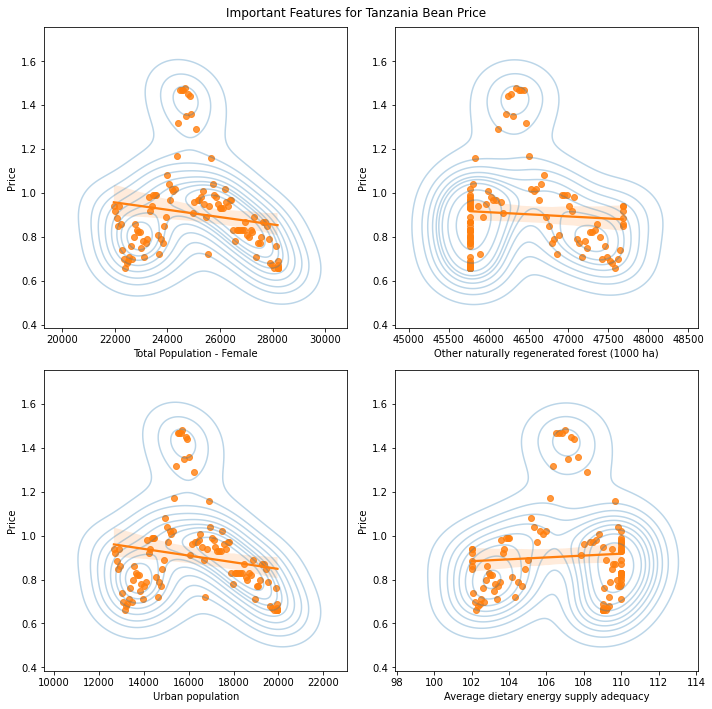

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
x_list =  ['Total Population - Female',
           'Other naturally regenerated forest (1000 ha)', 
           'Urban population',
           'Average dietary energy supply adequacy']

for i, axis in enumerate(fig.axes):
    sns.kdeplot(x=x_list[i], y='price', data=tanzania, alpha=0.3, ax=axis)
    sns.regplot(x=x_list[i], y='price', data=tanzania, ax=axis)
    axis.set_ylabel('Price')
    
fig.suptitle('Important Features for Tanzania Bean Price')
fig.tight_layout()
plt.show()

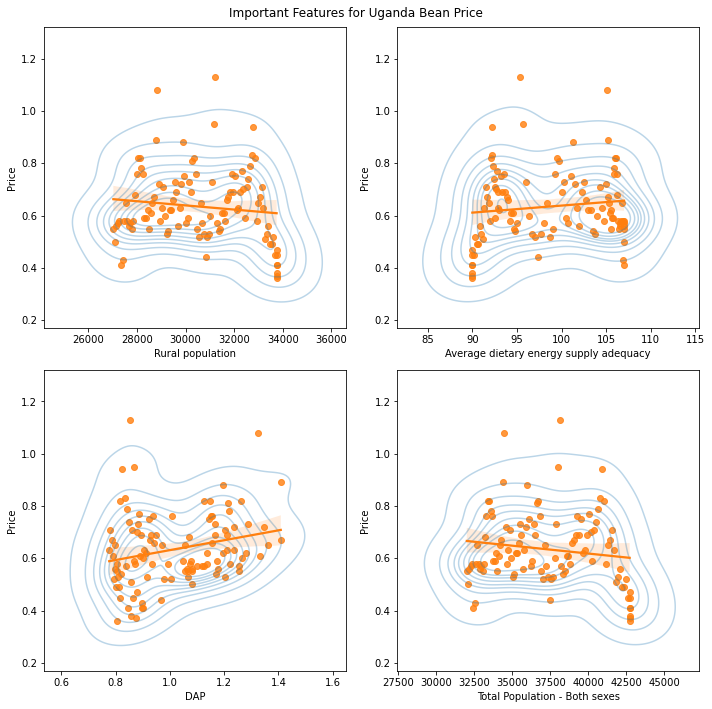

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
x_list =  ['Rural population', 'Average dietary energy supply adequacy',
           'DAP', 'Total Population - Both sexes']

for i, axis in enumerate(fig.axes):
    sns.kdeplot(x=x_list[i], y='price', data=uganda, alpha=0.3, ax=axis)
    sns.regplot(x=x_list[i], y='price', data=uganda, ax=axis)
    axis.set_ylabel('Price')

fig.suptitle('Important Features for Uganda Bean Price')
fig.tight_layout()
plt.show()